Python basic style:

In [17]:
from time import sleep

def inc(x):
  sleep(1)
  return x+1

def add(x, y):
  sleep(1)
  return x+y


In [2]:
%%time 

x = inc(1)
y = inc(2)
z = add(x, y)

CPU times: user 18.2 ms, sys: 2.12 ms, total: 20.3 ms
Wall time: 3 s


## Dask parallelism using delayed function - decorator

In [4]:
from dask import delayed

In [5]:
@delayed
def inc(x):
  sleep(1)
  return x+1

@delayed
def add(x, y):
  sleep(1)
  return x+y

In [6]:
%%time

x = delayed(inc)(1)
y = delayed(inc)(2)
z = delayed(add)(x, y)

CPU times: user 1.35 ms, sys: 0 ns, total: 1.35 ms
Wall time: 1.44 ms


Calculation hasn't happened yet due to ***delayed***

Just object was generated:

In [7]:
z

Delayed('add-5049a871-bd32-48a3-8fe1-c3c71cf793df')

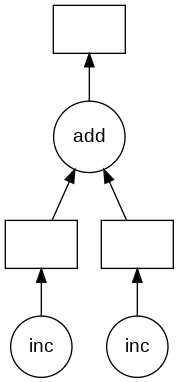

In [8]:
z.visualize()

In [14]:
%%time
z.compute()

CPU times: user 14.1 ms, sys: 2.93 ms, total: 17 ms
Wall time: 2.01 s


5

## Work out For LOOP for parallel computing

In [10]:
ar = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [21]:
%%time

result = []
for v in ar:
  y = inc(v)
  result.append(y)

sums = sum(result)

CPU times: user 48.1 ms, sys: 5.77 ms, total: 53.9 ms
Wall time: 10 s


In [23]:
%%time

result = []
for v in ar:
  y = delayed(inc)(v)
  result.append(y)

sums = delayed(sum)(result)

sums.compute()

CPU times: user 32 ms, sys: 4.58 ms, total: 36.5 ms
Wall time: 5.01 s


65

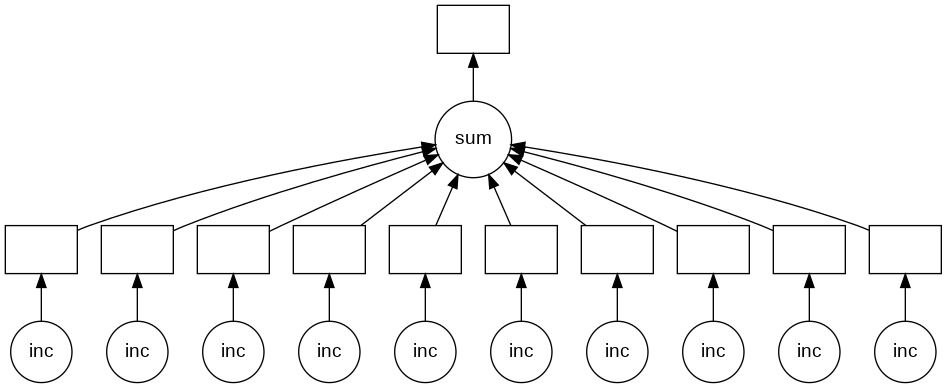

In [24]:
sums.visualize()

## Explore Dask DataFrame capability

In [25]:
dataset_url = "https://storage.googleapis.com/dask-tutorial-data/nycflights.tar.gz"

In [30]:
import dask.dataframe as dd
import os
import tarfile
import urllib

In [27]:
file, headers = urllib.request.urlretrieve(dataset_url, 'nycflights.tar.gz')
print("Loaded.")

Loaded.


In [29]:
with tarfile.open(file, mode='r:gz') as flights:
  flights.extractall('data/')

In [31]:
df = dd.read_csv(os.path.join('data', 'nycflights', '*.csv'),
                 parse_dates={'Date': [0, 1, 2]})
df

,Date,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
npartitions=10,,,,,,,,,,,,,,,,,,,,,
,datetime64[ns],int64,float64,int64,float64,int64,object,int64,float64,float64,int64,float64,float64,float64,object,object,float64,float64,float64,int64,int64
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


Can be seen that dataframe object created but data was not loaded!


In [32]:
df.head()

,Date,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,...,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
0,1990-01-01,1,1621.0,1540,1747.0,1701,US,33,NaN,86.0,...,NaN,46.0,41.0,EWR,PIT,319.0,NaN,NaN,0,0
1,1990-01-02,2,1547.0,1540,1700.0,1701,US,33,NaN,73.0,...,NaN,-1.0,7.0,EWR,PIT,319.0,NaN,NaN,0,0
2,1990-01-03,3,1546.0,1540,1710.0,1701,US,33,NaN,84.0,...,NaN,9.0,6.0,EWR,PIT,319.0,NaN,NaN,0,0
3,1990-01-04,4,1542.0,1540,1710.0,1701,US,33,NaN,88.0,...,NaN,9.0,2.0,EWR,PIT,319.0,NaN,NaN,0,0
4,1990-01-05,5,1549.0,1540,1706.0,1701,US,33,NaN,77.0,...,NaN,5.0,9.0,EWR,PIT,319.0,NaN,NaN,0,0


In [33]:
df.info()

<class 'dask.dataframe.core.DataFrame'>
Columns: 21 entries, Date to Diverted
dtypes: datetime64[ns](1), object(3), float64(10), int64(7)

In [34]:
df.tail()

ValueError: ignored

to fix the type misidentification pass it on defining dataset:

In [35]:
df = dd.read_csv(os.path.join('data', 'nycflights', '*.csv'),
                 parse_dates={'Date': [0, 1, 2]},
                 dtype={
                         'CRSElapsedTime': float,
                         'TailNum': str
                         })
df.tail()

,Date,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,...,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
269176,1999-12-27,1,1645.0,1645,1830.0,1901,UA,1753,N516UA,225.0,...,205.0,-31.0,0.0,LGA,DEN,1619.0,7.0,13.0,0,0
269177,1999-12-28,2,1726.0,1645,1928.0,1901,UA,1753,N504UA,242.0,...,214.0,27.0,41.0,LGA,DEN,1619.0,5.0,23.0,0,0
269178,1999-12-29,3,1646.0,1645,1846.0,1901,UA,1753,N592UA,240.0,...,220.0,-15.0,1.0,LGA,DEN,1619.0,5.0,15.0,0,0
269179,1999-12-30,4,1651.0,1645,1908.0,1901,UA,1753,N575UA,257.0,...,233.0,7.0,6.0,LGA,DEN,1619.0,5.0,19.0,0,0
269180,1999-12-31,5,1642.0,1645,1851.0,1901,UA,1753,N539UA,249.0,...,232.0,-10.0,-3.0,LGA,DEN,1619.0,6.0,11.0,0,0


In [36]:
%%time

df.DepDelay.max().compute()

CPU times: user 8.81 s, sys: 448 ms, total: 9.25 s
Wall time: 6.35 s


1435.0

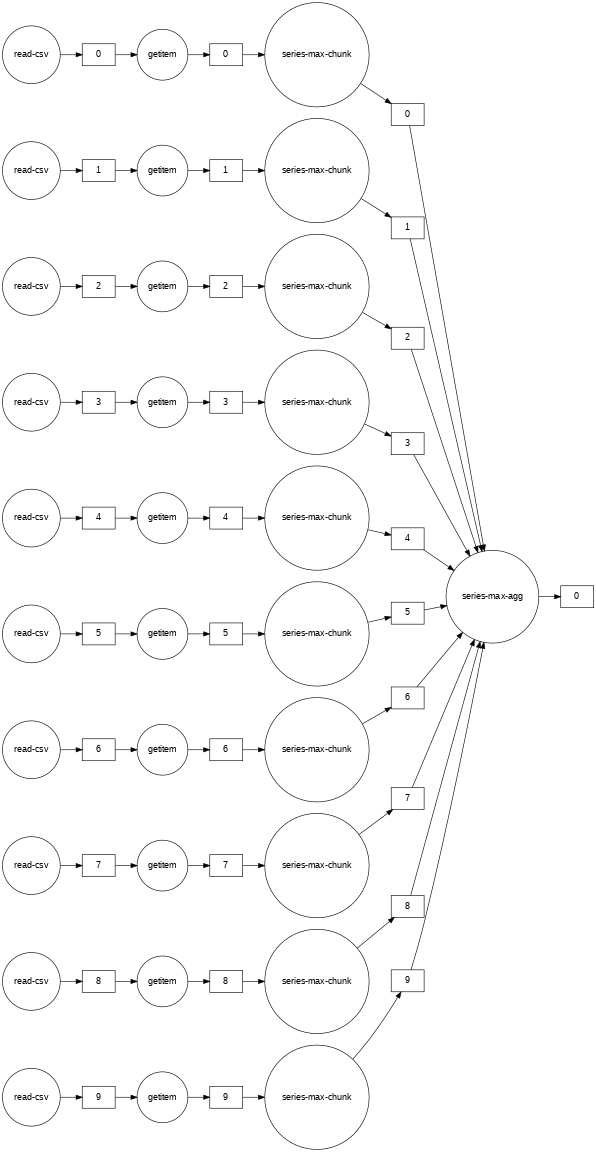

In [37]:
df.DepDelay.max().visualize(rankdir="LR", size='12, 12!')

## Use Dask to load large dataset for training models

In [38]:
df_train = df[['CRSDepTime', 'CRSArrTime', 'Cancelled']]
df_train.shape

(Delayed('int-73634f11-6b14-44e8-b6e7-32e77e34fc1a'), 3)

In [39]:
df_train.isnull().sum().compute()

CRSDepTime    0
CRSArrTime    0
Cancelled     0
dtype: int64

## Build simple neural network

In [40]:
from keras.models import Sequential
from keras.layers import Dense

In [56]:
X = df_train
X.shape[1]

3

In [49]:
model = Sequential()
model.add(Dense(20, input_dim=X.shape[1], activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='sgd',)

Generate batches from the dask df_train:

In [59]:
def data_generator(df, fraction=0.01):
  while True:
    batch = df.sample(frac=fraction)
    X = batch.iloc[:,:-1]
    y = batch.iloc[:, -1]
    yield X.compute(), y.compute()

In [ ]:
model.fit(data_generator(df_train))